# Imports

In [22]:
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [7]:
nodes_df = pd.read_csv('data/q1/politician_nodes.csv')
edges_df = pd.read_csv('data/q1/politician_edges.csv')

# Part A

In [8]:
g = ig.Graph.TupleList(edges_df.itertuples(index=False), directed=False) # since its mutal likes
g.vs['name'] = [str(i) for i in g.vs['name']]
name_map = dict(zip(nodes_df['id'].astype(str), nodes_df['page_name']))

In [14]:
deg = g.degree()
norm_deg = [d / (g.vcount() - 1) for d in deg]
ev = g.eigenvector_centrality()
close = g.closeness()
results = pd.DataFrame({
    'node_id': g.vs['name'],
    'real_name': [name_map.get(n, "Unknown") for n in g.vs['name']],
    'degree': norm_deg,
    'eigenvector': ev,
    'closeness': close
})

In [18]:
results.nlargest(10, 'degree')

,node_id,real_name,degree,eigenvector,closeness,deg_rank,ev_rank,close_rank
97,14650,Manfred Weber,0.056716,0.072494,0.282462,1.0,243.0,27.0
809,20415,Joachim Herrmann,0.044425,0.045930,0.260593,2.0,294.0,215.0
786,21491,Katarina Barley,0.038982,1.000000,0.254298,3.0,1.0,260.5
788,3070,Arno Klare MdB,0.038455,0.985071,0.253449,4.0,2.0,275.0
791,7357,Katja Mast,0.037928,0.968091,0.273207,5.0,3.0,57.0
389,11003,Barack Obama,0.034416,0.082600,0.352217,6.0,222.0,1.0
547,18155,Angela Merkel,0.032485,0.094844,0.288647,7.0,211.0,16.0
427,18819,Niels Annen,0.031080,0.796167,0.307406,8.0,8.0,3.0
438,17056,Martin Schulz,0.030553,0.733113,0.279482,9.0,12.0,38.0
150,16809,Sir Peter Bottomley MP,0.030202,0.000017,0.213568,10.0,3728.0,2345.0


In [19]:
results.nlargest(10, 'eigenvector')

,node_id,real_name,degree,eigenvector,closeness,deg_rank,ev_rank,close_rank
786,21491,Katarina Barley,0.038982,1.000000,0.254298,3.0,1.0,260.5
788,3070,Arno Klare MdB,0.038455,0.985071,0.253449,4.0,2.0,275.0
791,7357,Katja Mast,0.037928,0.968091,0.273207,5.0,3.0,57.0
782,16427,Christian Petry,0.028797,0.910655,0.253021,12.0,4.0,280.5
790,9363,Heike Baehrens,0.029148,0.907431,0.252875,11.0,5.0,283.5
775,22100,Klaus Mindrup,0.025110,0.847734,0.250462,16.0,6.0,330.0
827,8893,Michelle Müntefering,0.022651,0.815720,0.253359,25.0,7.0,276.0
427,18819,Niels Annen,0.031080,0.796167,0.307406,8.0,8.0,3.0
792,22110,Johannes Schraps,0.024583,0.780716,0.252214,17.5,9.0,297.0
1200,8351,Sigmar Gabriel,0.023529,0.776901,0.258417,19.5,10.0,238.0


In [20]:
results.nlargest(10, 'closeness')

,node_id,real_name,degree,eigenvector,closeness,deg_rank,ev_rank,close_rank
389,11003,Barack Obama,0.034416,0.082600,0.352217,6.0,222.0,1.0
437,3906,Michael Roth,0.020544,0.533900,0.309343,31.0,29.0,2.0
427,18819,Niels Annen,0.031080,0.796167,0.307406,8.0,8.0,3.0
1821,19877,Tanja Fajon,0.007902,0.043511,0.302042,284.0,302.0,4.0
55,14862,Malcolm Turnbull,0.019842,0.004655,0.299642,35.5,705.0,5.0
1215,6357,Mariano Rajoy Brey,0.011238,0.021806,0.299280,130.5,415.0,6.0
443,11719,Achim Post,0.022125,0.707999,0.298997,26.0,13.0,7.0
894,11149,Peter Tauber,0.018964,0.068794,0.296800,38.0,251.0,8.0
780,9554,Dietmar Nietan,0.023354,0.737399,0.293905,21.0,11.0,9.0
398,5448,Hillary Clinton,0.010711,0.041707,0.293829,145.5,311.0,10.0


Top 10 Nodes with Highest Power Efficiency (Low Degree/High Eigenvector):
                 real_name    degree  eigenvector  residual
782        Christian Petry  0.028797     0.910655  0.618282
790         Heike Baehrens  0.029148     0.907431  0.611375
786        Katarina Barley  0.038982     1.000000  0.600832
775          Klaus Mindrup  0.025110     0.847734  0.594028
788         Arno Klare MdB  0.038455     0.985071  0.591427
827   Michelle Müntefering  0.022651     0.815720  0.587793
791             Katja Mast  0.037928     0.968091  0.579970
1200        Sigmar Gabriel  0.023529     0.776901  0.539767
792       Johannes Schraps  0.024583     0.780716  0.532534
1449     Wolfgang Hellmich  0.018613     0.701666  0.516088


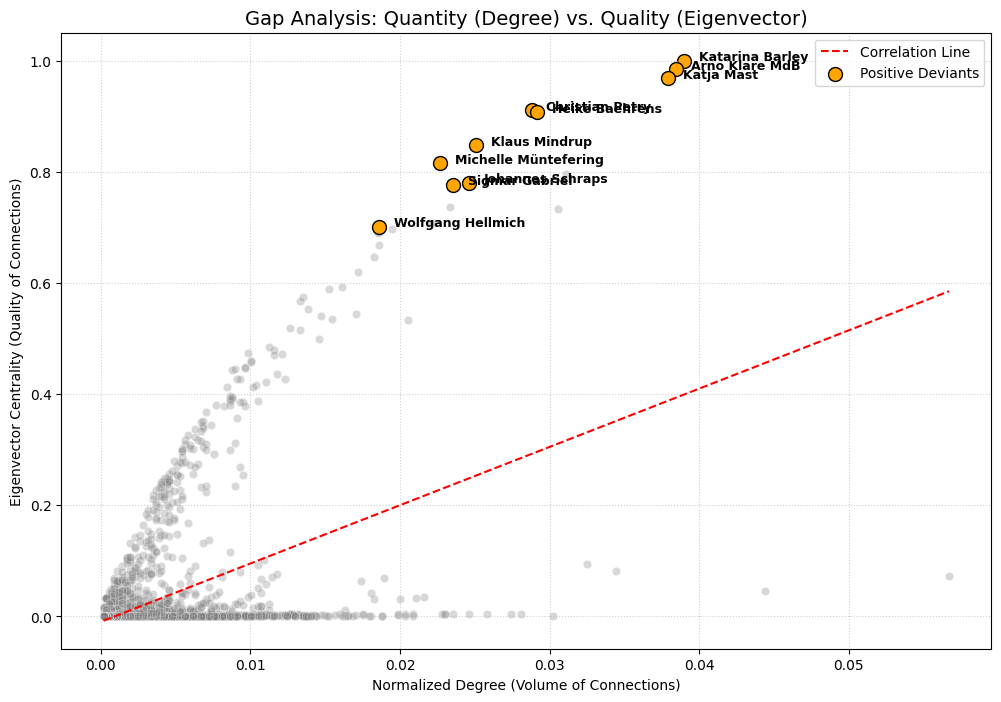

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(results['degree'], results['eigenvector'])
results['expected_ev'] = intercept + slope * results['degree']
results['residual'] = results['eigenvector'] - results['expected_ev']
top_deviants = results.nlargest(10, 'residual')
print("Top 10 Nodes with Highest Power Efficiency (Low Degree/High Eigenvector):")
print(top_deviants[['real_name', 'degree', 'eigenvector', 'residual']])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results, x='degree', y='eigenvector', alpha=0.3, color='gray')
x_vals = np.array([results['degree'].min(), results['degree'].max()])
plt.plot(x_vals, intercept + slope * x_vals, color='red', linestyle='--', label='Correlation Line')
plt.scatter(top_deviants['degree'], top_deviants['eigenvector'], color='orange', s=100, edgecolors='black', label='Positive Deviants')
for i, row in top_deviants.iterrows():
    plt.text(row['degree'] + 0.001, row['eigenvector'], row['real_name'], fontsize=9, fontweight='bold')

plt.title('Gap Analysis: Quantity (Degree) vs. Quality (Eigenvector)', fontsize=14)
plt.xlabel('Normalized Degree (Volume of Connections)')
plt.ylabel('Eigenvector Centrality (Quality of Connections)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [21]:
results['deg_rank'] = results['degree'].rank(ascending=False)
results['ev_rank'] = results['eigenvector'].rank(ascending=False)
results['close_rank'] = results['closeness'].rank(ascending=False)

candidates = results[(results['deg_rank'] > 100) & (results['ev_rank'] <= 50)].head(3)
print(candidates)

    node_id          real_name    degree  eigenvector  closeness  deg_rank  \
444   13175  Carsten Schneider  0.008780     0.442962   0.282378     228.5   
445    8335        Bernd Lange  0.011765     0.436510   0.288940     118.0   
777    7860  Barbara Hendricks  0.011238     0.484816   0.252875     130.5   

     ev_rank  close_rank  
444     43.0        29.0  
445     44.0        14.0  
777     33.0       283.5  
